In [30]:
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import collections
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [31]:
useless_words = stopwords.words('english') + list(string.punctuation)

In [32]:
train = pd.read_csv('../input/mbti_1.csv')

In [33]:
train.shape

(8675, 2)

In [34]:
train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [35]:
train['posts'][2]

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3

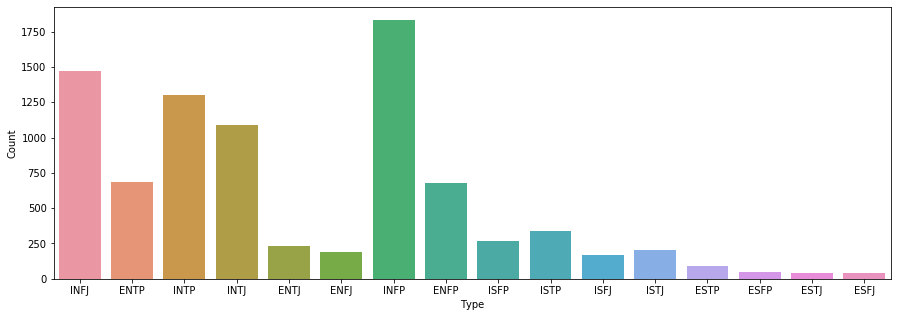

In [36]:
plt.figure(figsize=(15,5))
fig = sb.countplot(train.loc[:, 'type'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.show(fig)

### It had been chosen just two "balanced" type

In [37]:
#train = train(train.loc[:, 'type'] == 'INTP' or train.loc[: 'type'] == 'INTJ')
train = train.loc[(train['type'] == 'INTP') | (train['type'] == 'INTJ') | (train['type'] == 'INFJ')]

In [38]:
train.loc[:, 'type'].value_counts()

INFJ    1470
INTP    1304
INTJ    1091
Name: type, dtype: int64

In [39]:
train['posts1'] = [p.split('|||') for p in train.posts.values]

In [40]:
print(train['posts1'][2])

["'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw", "Of course, to which I say I know; that's my blessing and my curse.", "Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...", "No, I didn't; thank you for a link!", "So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...", 'Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...', 'The Smiths – Never Had No One Ever', 'I often find myself spotting faces on marble tiles/wood.', 'This 5 year-old sentence is an incredibly accurate and beautiful description.', "I haven't visited this website in 

In [41]:
del train['posts']

In [42]:
train.rename(columns={'posts1': 'posts'}, inplace=True)

In [43]:
print(train['posts'][3])

["'Dear INTP,   I enjoyed our conversation the other day.  Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...", 'Dear ENTJ sub,   Long time no see.  Sincerely, Alpha', 'None of them. All other types hurt in deep existential ways that I want no part of.', 'Probably a sliding scale that depends on individual preferences, like everything in humanity.', "Draco Malfoy also. I'd say he's either 358 or 368.", "I'm either 358 or 385, though in which stacking to me is a somewhat arbitrary distinction to make as I believe that the core indicates primary motivation and has a hand in every action. Therefore, a...", "I'm not particularly introverted or extraverted, personally. That said, I would say I'm somewhat unphased by either social interactions or being alone. What I'd say I crave more so than anything is...", "Dear Type 9 INFP,  Your absolute admiration of me is refreshing. You're a great girlfriend and I wish 

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 8672
Data columns (total 2 columns):
type     3865 non-null object
posts    3865 non-null object
dtypes: object(2)
memory usage: 250.6+ KB


In [45]:
unique_type_list = ['INFJ', 'INTP', 'INTJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

In [46]:
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

In [47]:
def preprocess_data(dataset):
    list_posts = []
    personality = []

    for index, row in dataset.iterrows():
        posts = row['posts']
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', str(posts))
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
        
        type_labelized = lab_encoder.transform([row['type']])[0]
        personality.append(type_labelized)
        list_posts.append(temp)
    
    posts = np.array(list_posts)
    personality = np.array(personality)
    return posts, personality


In [48]:
posts, personality = preprocess_data(train)

In [49]:
personality.shape

(3865,)

In [50]:
posts[1]

' good one link course say know blessing curse absolutely positive best friend could amazing couple count yes could madly love case reconciled feeling thank link called ti si loop stem current topic obsession deadly like stuck thought mind wanders circle feel truly terrible noticed peculiar vegetation look grass dozen different plant specie imagine hundred year later soil smith never one ever often find spotting face marble tile wood year old sentence incredibly accurate beautiful description visited website last year whoever read maybe even remembers highly doubt hi sit garden pm writing song sing together dozen cricket playing acoustic guitar intp ish thread ever seen able look painting entire life knew picked human drawing background animation working right mar felt obligated make mark watneyx postcard read book started make comic turtle gordon unicorn chime see two first story link intj recently started post comic two friend turtle gordon unicorn chime posted stuff interested try i

In [51]:
trainset = pd.DataFrame({'target': personality, 'posts': posts})

In [52]:
trainset['id'] = trainset.index

In [53]:
testset = trainset.iloc[3001:, :]
trainset = trainset.iloc[:3000, :]


In [54]:
testset.shape

(864, 3)

In [56]:
trainset.to_csv('../input/trainset.csv')
testset.to_csv('../input/testset.csv')